# Diseño de una Montaña Rusa

![Imagen de la montaña rusa](src/mtn_r.jpg)


### Import de datos del CSV

In [56]:
import csv
import numpy as np

def get_arr_float(fila):
    with open('data.csv', 'r') as file:
        reader = csv.reader(file)
        rows=list(reader)
        arr=rows[fila]
        float_array = [float(item) for item in arr if item != '']
    return np.array(float_array)

def get_arr_int(fila):
    with open('data.csv', 'r') as file:
        reader = csv.reader(file)
        rows=list(reader)
        arr=rows[fila]
        int_array = [int(item) for item in arr if item != '']
    return np.array(int_array)

def get_arr_2d(fila):
    with open('data.csv', 'r') as file:
        reader = csv.reader(file)
        rows=list(reader)
        arr=rows[fila]
        array=[item for item in arr if item != '']
        cont=0
        matriz=[]
        for f in array:
            linea=f.split(',')
            linea_floats = [float(item) for item in linea if item != '']
            matriz.append(linea_floats)
            cont+=1
        return (matriz)
    
#Asigancion de los datos del .CSV a las variables correspondientes

x_data1 = get_arr_float(0)
y_data1 = get_arr_float(1)
x_vals1 = get_arr_float(2)

x_data2 = get_arr_int(3)
y_data2 = get_arr_float(4)
x_vals2 = get_arr_int(5)

matriz_A=get_arr_2d(6)
vector_b=get_arr_float(7)

#Muestra de datos
print("Datos Paso 1:")
print("x_data1: ", x_data1)
print("y_data1: ", y_data1)
print("x_vals1: ", x_vals1)
print("\n Datos Paso 2:")
print("x_data2: ", x_data2)
print("y_data2: ", y_data2)
print("x_vals2: ", x_vals2)
print("\n Datos Paso 4:")
print("A: ", matriz_A)
print("b: ", vector_b)


Datos Paso 1:
x_data1:  [0. 1. 2. 3. 4. 5.]
y_data1:  [0.5 0.8 1.  0.9 1.2 0.7]
x_vals1:  [  0.   5. 100.]

 Datos Paso 2:
x_data2:  [0 1 2 3 4]
y_data2:  [1.1 3.5 2.8 4.2 5. ]
x_vals2:  [  0   4 100]

 Datos Paso 4:
A:  [[1.0, 2.0, 1.0], [2.0, -1.0, 1.0], [3.0, 1.0, -1.0]]
b:  [ 4.  1. -2.]


## Paso 1

[0.00622009569377987*x**3 + 0.29377990430622*x + 0.5, -0.131100478468899*x**3 + 0.411961722488038*x**2 - 0.118181818181818*x + 0.637320574162679, 0.318181818181818*x**3 - 2.28373205741627*x**2 + 5.27320574162679*x - 2.95693779904306, -0.441626794258373*x**3 + 4.55454545454545*x**2 - 15.2416267942584*x + 17.5578947368421, 0.248325358851675*x**3 - 3.72488038277512*x**2 + 17.8760765550239*x - 26.599043062201]
Polinomios por tramos: 
 x = [0.0,1.0]
0.00622009569377987*x**3 + 0.29377990430622*x + 0.5
 x = [1.0,2.0]
-0.131100478468899*x**3 + 0.411961722488038*x**2 - 0.118181818181818*x + 0.637320574162679
 x = [2.0,3.0]
0.318181818181818*x**3 - 2.28373205741627*x**2 + 5.27320574162679*x - 2.95693779904306
 x = [3.0,4.0]
-0.441626794258373*x**3 + 4.55454545454545*x**2 - 15.2416267942584*x + 17.5578947368421
 x = [4.0,5.0]
0.248325358851675*x**3 - 3.72488038277512*x**2 + 17.8760765550239*x - 26.599043062201


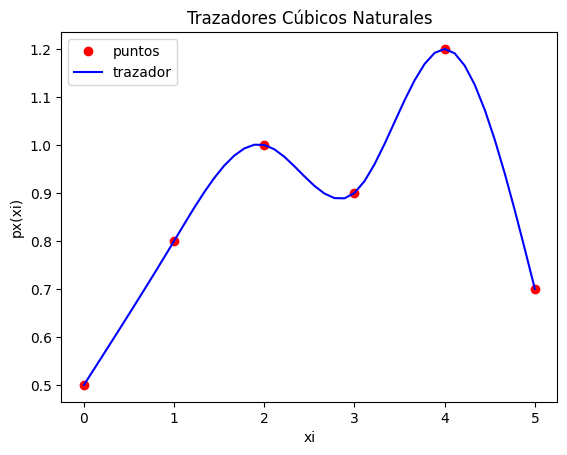

In [59]:
#Julio

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def trazador_cubico(xi,yi):
    n = len(xi)
    
    #Se crea un array dife que almacena las diferencias entre valores x consecutivos.
    #Esto se usa para calcular los intervalos entre puntos.
    dife = np.zeros(n-1, dtype = float)
    for j in range(n-1):
        dife[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    m_A = np.zeros(shape=(n-2,n-2), dtype = float)
    m_B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    m_A[0,0] = 2*(dife[0]+dife[1])
    m_A[0,1] = dife[1]
    m_B[0] = 6*((yi[2]-yi[1])/dife[1] - (yi[1]-yi[0])/dife[0])

    for i in range(1,n-3):
        m_A[i,i-1] = dife[i]
        m_A[i,i] = 2*(dife[i]+dife[i+1])
        m_A[i,i+1] = dife[i+1]
        #representa la diferencia dividida entre los puntos (i+2) e (i+1) y (i+1) e i
        dd_21 = (yi[i+2]-yi[i+1])/dife[i+1]
        dd_10 = (yi[i+1]-yi[i])/dife[i]
        
        m_B[i] = 6*(dd_21 - dd_10)
        
    m_A[n-3,n-4] = dife[n-3]
    m_A[n-3,n-3] = 2*(dife[n-3]+dife[n-2])
    dd_12 = (yi[n-1]-yi[n-2])/dife[n-2]
    dd_23 = (yi[n-2]-yi[n-3])/dife[n-3]
    m_B[n-3] = 6*(dd_12 - dd_23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(m_A,m_B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*dife[j])
        b[j] = S[j]/2
        dd_10 = (yi[j+1]-yi[j])/dife[j]
        c[j] = dd_10 - (2*dife[j]*S[j]+dife[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    tabla = []
    for j in range(0,n-1,1):

        tramox = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2 + c[j]*(x-xi[j])+ d[j]
        
        tramox = tramox.expand()
        tabla.append(tramox)
    print(tabla)
    return(tabla)

# PROGRAMA -----------------------
# INGRESO , Datos de prueba
muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(x_data1)
tabla = trazador_cubico(x_data1,y_data1)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(x_data1[tramo-1])
          +','+str(x_data1[tramo])+']')
    print(str(tabla[tramo-1]))

# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = x_data1[tramo-1]
    b = x_data1[tramo]
    xtramo = np.linspace(a,b,muestras)
    
    # evalua polinomio del tramo
    tramox = tabla[tramo-1]
    pxt = sym.lambdify('x',tramox)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(x_data1,y_data1,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador', color='blue')
plt.title('Trazadores Cúbicos Naturales')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()


## Paso 2

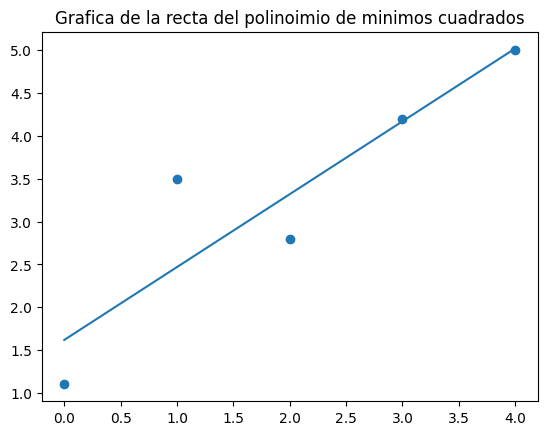

In [73]:
#Jose
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

#Valores para graficar la curva
x_vals=np.linspace(x_vals2[0],x_vals2[1],x_vals2[2])

#Inicializacion de arrays
xy_data=x_data2*y_data2 #Multiplicacion de arrays
x_squared=np.square(x_data2) #Eleva al cuadrado los valores de x

sumastorias=np.zeros(4)

#Calculo de las sumatorias
sumastorias[0]=np.sum(y_data2)
sumastorias[1]=np.sum(x_data2)
sumastorias[2]=np.sum(xy_data)
sumastorias[3]=np.sum(x_squared)

#Calculo de la pendiente
m=((sumastorias[2]-((sumastorias[1]*sumastorias[0])/(5)))/(sumastorias[3]-((sumastorias[1]**2)/(5))))
#Calculo de la ordenada al origen
b=((sumastorias[0]/5)-m*(sumastorias[1]/5))
#cálculo de la recta
y_vals=m*x_vals+b

#Graficar
plt.plot(x_vals,y_vals)
plt.scatter(x_data2,y_data2)
plt.title("Grafica de la recta del polinoimio de minimos cuadrados")
plt.grid(True)
plt.show()



## Paso 3

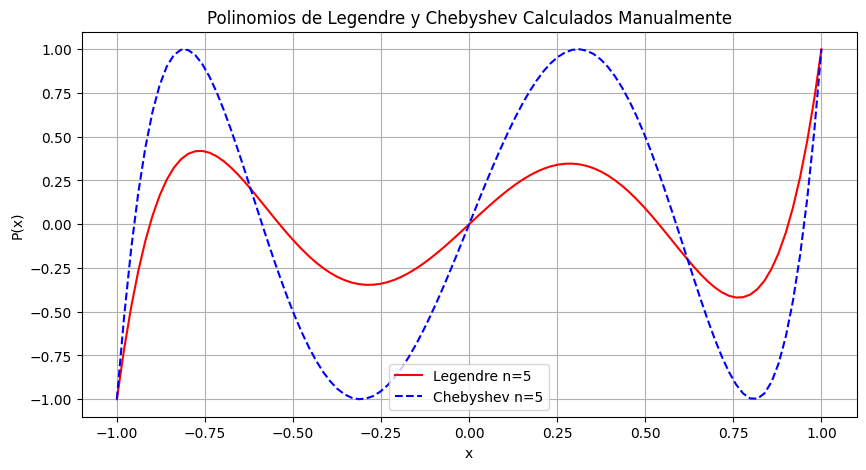

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

# Funciones para calcular los polinomios manualmente
def calcular_legendre(n, x):
    p_n = np.zeros_like(x)
    for k in range(n+1):
        coef = binom(n, k) ** 2
        p_n += coef * ((x-1)**(n-k)) * ((x+1)**k) 
    return p_n / (2**n)

def calcular_chebyshev(n, x):
    if n == 0:
        return np.ones_like(x)
    elif n == 1:
        return x
    t0, t1 = np.ones_like(x), x
    for i in range(2, n+1):
        t2 = 2 * x * t1 - t0
        t0, t1 = t1, t2
    return t1

# Generar 100 puntos equidistantes en el intervalo definido por x_vals2
x = np.linspace(-1,1,100)

# Usar x para calcular los polinomios
n = 5  # Grado del polinomio
y_legendre = calcular_legendre(n, x)
y_chebyshev = calcular_chebyshev(n, x)

# Graficar los polinomios
plt.figure(figsize=(10, 5))
plt.plot(x, y_legendre, 'r-', label=f'Legendre n={n}')
plt.plot(x, y_chebyshev, 'b--', label=f'Chebyshev n={n}')

plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Polinomios de Legendre y Chebyshev Calculados Manualmente')
plt.grid(True)
plt.show()

## Paso 4

In [58]:
import numpy as np

def gauss_elimination(A, b):
    n = len(A)
    if len(b) != n:
        raise ValueError("El tamaño de b no coincide con el tamaño de A.")

    # Convertir A y b a float para evitar problemas de división entera
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)

    # Eliminación hacia adelante
    for i in range(n-1):
        for j in range(i+1, n):
            if A[i][i] == 0:
                raise ValueError("División por cero detectada.")
            factor = A[j][i] / A[i][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        sum_ax = 0
        for j in range(i+1, n):
            sum_ax += A[i][j] * x[j]
        x[i] = (b[i] - sum_ax) / A[i][i]
    return x

# Verificacion b sea un arreglo unidimensional
b = np.array(b).flatten()

# Usar la función gauss_elimination con A y b obtenidos del archivo
x = gauss_elimination(matriz_A, vector_b)

# Mostrar el resultado
print("matriz A: ", matriz_A)
print("vector b: ", vector_b)

print("Fuerzas en los puntos críticos:", x)



matriz A:  [[1.0, 2.0, 1.0], [2.0, -1.0, 1.0], [3.0, 1.0, -1.0]]
vector b:  [ 4.  1. -2.]
Fuerzas en los puntos críticos: [-0.2         0.93333333  2.33333333]
